<a href="https://colab.research.google.com/github/rizwan-mushtaq-blog/AI-BootCamp3/blob/main/Copy_of_pyBibX_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
############################################################################

# Created by: Prof. Valdecy Pereira, D.Sc.
# UFF - Universidade Federal Fluminense (Brazil)
# email:  valdecy.pereira@gmail.com
# pyBibX - A Bibliometric and Scientometric Library
# Example - WOS

# Citation:
# PEREIRA, V. (2022). Project: pyBibX, File: pbibx.py, GitHub repository: <https://github.com/Valdecy/pyBibX>

############################################################################

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
!pip install pybibx
!pip install tabulate

In [15]:
# Dowload .bib file
#!wget https://github.com/Valdecy/pyBibX/raw/main/assets/bibs/wos.bib

In [16]:
# Required Libraries
import numpy as np
import pandas as pd
import textwrap

from google.colab import data_table
from tabulate import tabulate
from prettytable import PrettyTable
from pybibx.base import pbx_probe

In [58]:
# Load .bib
# Arguments: file_bib = 'filename.bib'; db = 'scopus', 'wos', 'pubmed'; del_duplicated = True, False
file_name = '/content/drive/MyDrive/Colab Notebooks/Corporate Social Responsbility.bib'
database  = 'wos'
bibfile   = pbx_probe(file_bib = file_name, db = database, del_duplicated = True)

A Total of 59 Documents were Found ( 60 Documents and 1 Duplicates )

Article = 49
Book Review; Early Access = 1
Editorial Material = 3
Editorial Material; Early Access = 1
Review = 4
Review; Early Access = 1


In [60]:
# Removing duplicate entries is handled within pbx_probe now.
bibfile   = pbx_probe(file_bib = file_name, db = database, del_duplicated = True)

A Total of 59 Documents were Found ( 60 Documents and 1 Duplicates )

Article = 49
Book Review; Early Access = 1
Editorial Material = 3
Editorial Material; Early Access = 1
Review = 4
Review; Early Access = 1


In [61]:
# Health Analysis
health = bibfile.health_bib()

# Check Health
health

,Entries,Completeness (%),Number of Docs
0,Sources,100.00%,59
1,Abstracts,98.31%,58
2,Affiliation,100.00%,59
3,Author(s),100.00%,59
4,DOI,100.00%,59
5,Keywords - Authors,96.61%,57
6,Keywords - Plus,98.31%,58
7,References,100.00%,59
8,Year,100.00%,59


In [62]:
# Generate EDA (Exploratory Data Analysis) Report
report  = bibfile.eda_bib()

# Check Report
report

,Main Information,Results
0,Timespan,2002-2024
1,Total Number of Countries,27
2,Total Number of Institutions,124
3,Total Number of Sources,1
4,Total Number of References,4505
5,Total Number of Languages,1
6,--english (# of docs),59
7,-//-,-//-
8,Total Number of Documents,59
9,--Article,49


In [63]:
# The metadata can be reviewed and manually modified. If you need to make adjustments, you can directly edit the bibfile.data, which is a DataFrame containing all the utilized information.
print(tabulate(bibfile.data.head(n = 10), headers = 'keys', tablefmt = 'psql'))
# Modify 'bibfile.data' as needed.

+----+-----------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [64]:
# Check Docs IDs
data_table.DataTable(bibfile.table_id_doc, num_rows_per_page = 15)

,ID,Document
0,0,"Tashman, Peter and Marano, Valentina and Kosto..."
1,1,"Ding, Wenzhi and Levine, Ross and Lin, Chen an..."
2,2,"Husted, Bryan W. and Allen, David B. (2006). C..."
3,3,"Han, Qin and Jennings, Jennifer E. and Liu, Ru..."
4,4,"Maignan, I and Ralston, DA (2002). Corporate s..."
5,5,"Carney, Richard W. and El Ghoul, Sadok and Gue..."
6,6,"Rathert, Nikolas (2016). Strategies of legitim..."
7,7,"Graafland, Johan and Noorderhaven, Niels (2020..."
8,8,"Li, Cheng and Cuervo-Cazurra, Alvaro (2024). H..."
9,9,"El Ghoul, Sadok and Guedhami, Omrane and Kim, ..."


In [65]:
# Check Docs IDs per Type
data_table.DataTable(bibfile.id_doc_types(), num_rows_per_page = 15)

,Document Types,IDs
0,Article,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,Book Review; Early Access,[22]
2,Editorial Material,"[14, 25, 29]"
3,Editorial Material; Early Access,[27]
4,Review,"[26, 30, 41, 46]"
5,Review; Early Access,[56]


In [66]:
# Check Authors IDs
data_table.DataTable(bibfile.table_id_aut, num_rows_per_page = 15)

,ID,Author
0,a_0,"adeola, ogechi"
1,a_1,"adetoun, bolanle"
2,a_2,"aguilera, v, ruth"
3,a_3,"akamah, herita"
4,a_4,"alberto aragon-correa, j."
...,...,...
197,a_197,"yeung, henry wai-chung"
198,a_198,"yi, jingtao"
199,a_199,"young, susan l."
200,a_200,"zaheer, srilata"


In [67]:
# Check Sources IDs
data_table.DataTable(bibfile.table_id_jou, num_rows_per_page = 15)

,ID,Source
0,j_0,j. int. bus. stud.


In [68]:
# Check Institutions IDs
data_table.DataTable(bibfile.table_id_uni, num_rows_per_page = 15)

,ID,Institution
0,i_0,univ york
1,i_1,sun yat sen univ
2,i_2,michigan state univ
3,i_3,univ pretoria
4,i_4,queens univ
...,...,...
119,i_119,egade business sch
120,i_120,univ saskatchewan
121,i_121,univ kassel
122,i_122,univ tulsa


In [69]:
# Check Countries IDs
data_table.DataTable(bibfile.table_id_ctr, num_rows_per_page = 15)

,ID,Country
0,c_0,Finland
1,c_1,France
2,c_2,Thailand
3,c_3,China
4,c_4,Australia
5,c_5,United Arab Emirates
6,c_6,Austria
7,c_7,UNKNOWN
8,c_8,Niger
9,c_9,Canada


In [70]:
# Check Authors Keywords IDs
data_table.DataTable(bibfile.table_id_kwa, num_rows_per_page = 15)

,ID,KWA
0,k_0,corporate social responsibility
1,k_1,institutional theory
2,k_2,sustainability
3,k_3,multinational corporations
4,k_4,nonmarket strategy
...,...,...
234,k_234,attention
235,k_235,apparel
236,k_236,aggregation
237,k_237,agency theory


In [71]:
# Check Keywords Plus IDs
data_table.DataTable(bibfile.table_id_kwp, num_rows_per_page = 15)

,ID,KWP
0,p_0,corporate social-responsibility
1,p_1,international-business
2,p_2,performance
3,p_3,management
4,p_4,governance
...,...,...
269,p_269,agency
270,p_270,advancing interdisciplinary research
271,p_271,actually value sustainability
272,p_272,activism


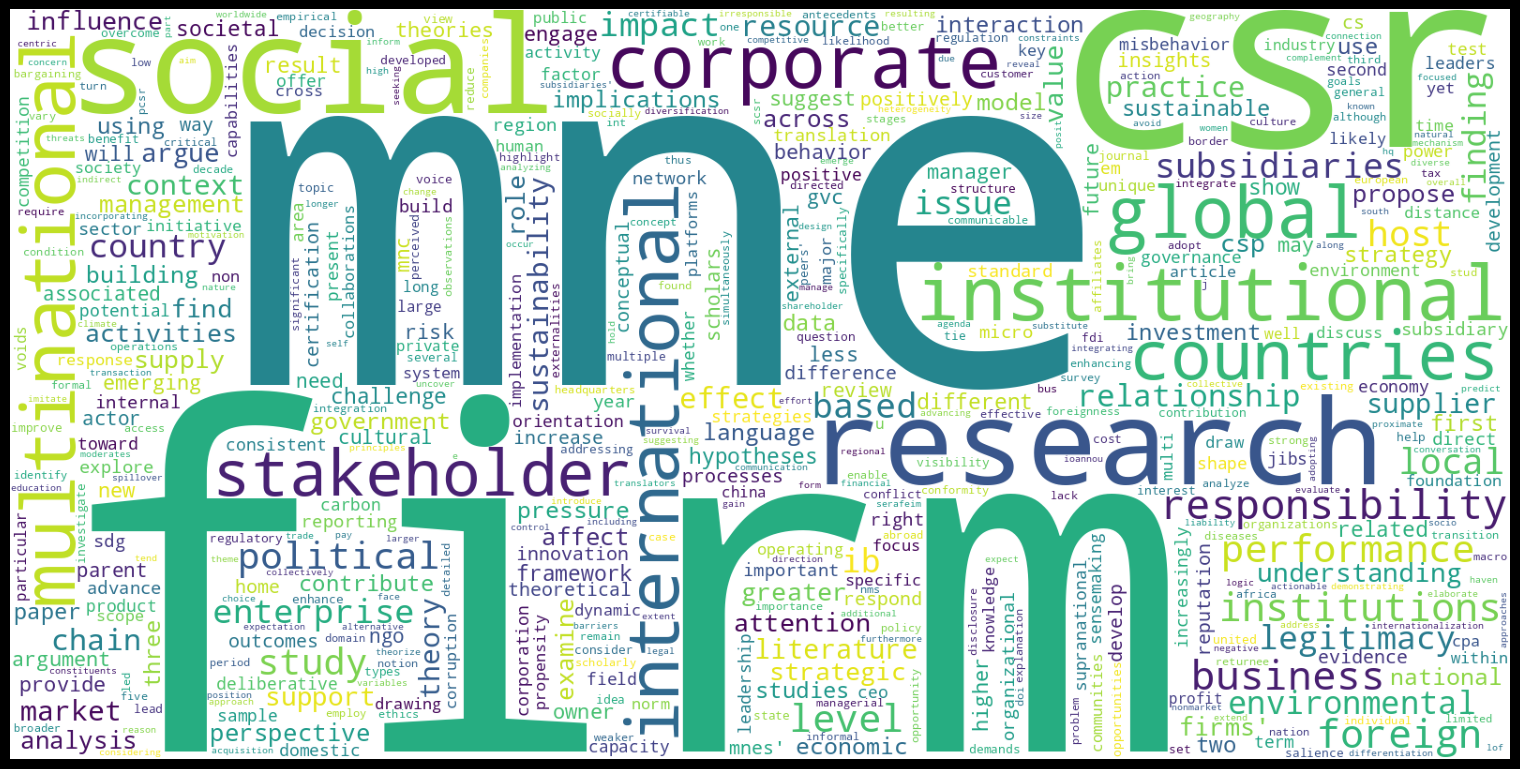

In [72]:
# WordCloud from the Abstracts, Title, Authors Keywords or Keywords Plus
# Arguments: entry = 'abs', 'title', 'kwa', or 'kwp'
bibfile.word_cloud_plot(entry = 'abs', size_x = 15, size_y = 10, wordsn = 500)

In [73]:
# Check Table
num_columns = 5
data_wd     = bibfile.ask_gpt_wd
items       = list(data_wd.items())

field_names = []
for i in range(num_columns):
    field_names.append(f"Word {i + 1}")
    field_names.append(f"Importance {i + 1}")

table = PrettyTable()
table.field_names = field_names

for i in range(0, len(items), num_columns):
    row = []
    for j in range(num_columns):
        if i + j < len(items):
            word, importance = items[i + j]
            row.extend([word, round(importance, 4)])
        else:
            row.extend(["", ""])
    table.add_row(row)

# Print the table
print(table)

+----------------+--------------+-----------------+--------------+----------------+--------------+----------------------+--------------+-----------------+--------------+
|     Word 1     | Importance 1 |      Word 2     | Importance 2 |     Word 3     | Importance 3 |        Word 4        | Importance 4 |      Word 5     | Importance 5 |
+----------------+--------------+-----------------+--------------+----------------+--------------+----------------------+--------------+-----------------+--------------+
|      mne       |     1.0      |       firm      |    0.9151    |      csr       |    0.8113    |        social        |    0.6604    |     research    |     0.5      |
| institutional  |    0.4623    |  multinational  |    0.4434    |   corporate    |    0.434     |    international     |    0.4245    |      global     |    0.4151    |
|   countries    |    0.3868    |   stakeholder   |    0.3868    | responsibility |    0.3396    |       business       |    0.3208    |   institution

In [74]:
# N-Grams
# Arguments: view       = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            entry      = 'abs', 'title', 'kwa', or 'kwp'
#            n_grams    = An integer with size n (representing the most common groups of words with size n)
#            stop_words = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                        'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                        'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                        'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus
#             wordsn           = Number of N-Grams
bibfile.get_top_ngrams(view = 'notebook', entry = 'kwp', ngrams = 3, stop_words = [], rmv_custom_words = [], wordsn = 15)

In [75]:
# Check Table
data_ng = bibfile.ask_gpt_ng
data_table.DataTable(data_ng, num_rows_per_page = 15)

,Word,Freq
0,corporate social responsibility,30
1,foreign direct investment,8
2,social responsibility international,6
3,responsibility international business,5
4,direct investment corporate,3
5,investment corporate social,3
6,performance governance management,2
7,resource based view,2
8,financial performance multinational,2
9,performance multinational enterprise,2


In [76]:
# Documents Projection based on Words. (An interactive plot). It returns the Projection (each document coordinate) and the Labels (each document cluster)
# Arguments: view              = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            corpus_type       = 'abs', 'title', 'kwa', or 'kwp';
#            stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                                'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                                'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                                'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            custom_label      = A list of custom labels for each document. The user can define each document cluster;
#            custom_projection = A list of custom coordinates for each document. The user can define each document coordinate;
#            n_components      = Number of Dimensions;
#            n_clusters        = Number of Clusters;
#            node_labels       = If True, labels appear in nodes
#            node_size         = Node size
#            node_font_size    = Node font size
#            tf_idf            = True or False (True -> The Cluster Algorithm will use the DTM to calculate each document Label. False -> The Cluster Algorithm will use the Coordinates to calculate each document Label)
#            embeddings        = True or False (True -> The Cluster Algorithm will use the Word Embeddings to calculate each document Label. False -> The Cluster Algorithm will use the Coordinates to calculate each document Label)
#            method            = 'tsvd' or 'umap' ('tsvd' -> Truncated SVD projection method is used. 'umap' -> UMAP projection method is used)
projection, labels = bibfile.docs_projection(view              = 'notebook',
                                             corpus_type       = 'abs',
                                             stop_words        = ['en'],
                                             rmv_custom_words  = [],
                                             custom_label      = [],
                                             custom_projection = [],
                                             n_components      = 2,
                                             n_clusters        = 5,
                                             node_labels       = True,
                                             node_size         = 12,
                                             node_font_size    = 5,
                                             tf_idf            = False,
                                             embeddings        = False,
                                             method            = 'umap')

In [77]:
# Check Table
data_pr = pd.DataFrame(np.hstack([projection, labels.reshape(-1,1)]))
data_table.DataTable(data_pr, num_rows_per_page = 15)

,0,1,2
0,17.962988,6.855669,2.0
1,17.875113,8.096629,0.0
2,17.065067,6.984064,4.0
3,17.444078,8.021291,0.0
4,17.610743,7.594130,0.0
5,17.670128,7.429769,0.0
6,17.976839,7.258101,1.0
7,16.820524,7.989481,0.0
8,18.519936,7.681953,1.0
9,18.111290,7.908157,1.0


In [78]:
# Check Articles per Cluster
cluster      = 0
idx_articles = [i for i in range(0, labels.shape[0]) if labels[i] == cluster]
print(*idx_articles, sep = ', ')

1, 3, 4, 5, 7, 11, 12, 14, 20, 21, 24, 33, 34, 35, 36, 38, 42


In [79]:
# Arguments: view              = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            key               = 'abs', 'title', 'jou, 'kwa', or 'kwp';
#            stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                                'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                                'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                                'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            topn              = Total number entities;
#            txt_font_size     = Font size of the text inside the bins;
#            start             = Start Year; -1 = all years
#            end               = End Year;   -1 = all years
bibfile.plot_evolution_year(view             = 'notebook',
                            stop_words       = [],
                            rmv_custom_words = [],
                            key              = 'kwa',
                            topn             = 10,
                            txt_font_size    = 12,
                            start            = 2010,
                            end              = 2021)

In [80]:
# View Table
data_ep = bibfile.ask_gpt_ep
print(textwrap.fill(data_ep, 150))

 2011: corporate social responsibility (1), global stakeholders (1), fuzzy set methods (1) 2012: corporate social responsibility (2), nonmarket
strategy (1), liability of foreignness (1), survey method (1), political strategies (1), multiple regression analysis (1), business and society (1),
primary data source (1), markets and institutions (1), institutional distance (1) 2014: corporate social responsibility (1), institutional theory (1),
national culture (1), multilevel analysis (1), labor practices (1), institutional environment (1), profit maximization (1), hierarchical linear
modeling (1), apparel (1) 2015: corporate social responsibility (2), institutional theory (1), multinational corporations (mncs) and enterprises
(mnes) (1), translation) (1), swahili (1), simultaneous equation modeling (1), silent language (1), practice implementation (1), mne stakeholder
relationships (1), language (language design (1) 2016: corporate social responsibility (2), non-market strategy (1), forei

In [81]:
# Arguments: view              = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            topn              = Most frequent n words
#            custom            = Plot specific words
bibfile.plot_evolution_year_complement(data_ep, view = 'notebook', topn = 10, custom = [])

In [82]:
# Sankey Diagram (An interactive plot)
# Arguments: view  = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            entry = a list of any length of the following keys -> 'aut', 'cout', 'inst', 'jou', 'kwa', 'kwp', 'lan';
#            topn  = Total number entities
bibfile.sankey_diagram(view = 'notebook', entry = ['aut', 'cout', 'inst', 'lan'], topn = 10)

# PS: The white bars can be dragged

In [83]:
# View Table
data_sk = bibfile.ask_gpt_sk
data_table.DataTable(data_sk, num_rows_per_page = 15)

,Node From,Node To,Connection Weigth
0,"husted, bryan w.",Mexico,3
1,"kostova, tatiana",United States of America,3
2,"marano, valentina",United States of America,3
3,"el ghoul, sadok",Canada,2
4,"doh, jonathan",United States of America,2
5,"tashman, peter",United States of America,2
6,"christmann, petra",UNKNOWN_Countries,1
7,"rodriguez, peter",UNKNOWN_Countries,1
8,"darendeli, izzet sidki",United States of America,1
9,"waldman, david a.",UNKNOWN_Countries,1


In [84]:
# Tree Map
# Arguments: view          = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            entry         = 'kwp', 'kwa', 'aut', 'jou', 'ctr', or 'inst';
#            topn          = Total number entities
#            txt_font_size = Font size of the text inside the bins;
#bibfile.tree_map(view = 'notebook', entry = 'jou', topn = 20)

In [85]:
# Authors Productivity Plot (An interactive plot). It informs for each year the documents (IDs) published for each author
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            topn = Total number entities
bibfile.authors_productivity(view = 'notebook', topn = 20)

In [86]:
# View Table
data_ap = bibfile.ask_gpt_ap
data_table.DataTable(data_ap, num_rows_per_page = 15)

,2006,2012,2014,2016,2017,2019,2020,2021,2022,2023,2024
"marano, valentina",0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
"husted, bryan w.",1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
"montiel, ivan",0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
"kostova, tatiana",0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
"tashman, peter",0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
"park, junghoon",0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
"luo, yadong",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
"guedhami, omrane",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
"el ghoul, sadok",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
"eden, lorraine",1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
# Countries Productivity Plot (An interactive plot). It informs the production for each Country (count is made considering each doc author)
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
bibfile.countries_productivity(view = 'notebook')

In [88]:
# Bar Plots
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#                    statistic = 'dpy', 'cpy', 'ppy', 'ltk', 'spd', 'spc', 'apd', 'apc', 'aph', 'bdf_1', 'bdf_2', 'bdf_3', 'ipd', 'ipc', 'cpd', 'cpc', 'lpd', 'kpd', 'kad'
#                        'dpy' = Documents per Year
#                         cpy' = Citations per Year
#                        'ppy' = Past Citations per Year
#                        'ltk' = Lotka's Law
#                        'spd' = Sources per Documents
#                        'spc' = Sources per Citations
#                        'apd' = Authors per Documents
#                        'apc' = Authors per Citations
#                        'aph' = Authors per H-Index
#                        'bdf_1', 'bdf_2', 'bdf_3' = Bradford's Law - Core Sources 1, 2 or 3
#                        'ipd' = Institutions per Documents
#                        'ipc' = Institutions per Citations
#                        'cpd' = Countries per Documents
#                        'cpc' = Countries per Citations
#                        'lpd' = Language per Documents
#                        'kpd' = Keywords Plus per Documents
#                        'kad' = Authors' Keywords per Documents
#                         topn = Total number entities
bibfile.plot_bars(view = 'notebook', statistic = 'apd', topn = 20)

In [89]:
# View Table
data_bp = bibfile.ask_gpt_bp
data_table.DataTable(data_bp, num_rows_per_page = 15)

,Documents,Authors
0,"marano, valentina",4
1,"husted, bryan w.",4
2,"montiel, ivan",3
3,"kostova, tatiana",3
4,"tashman, peter",2
5,"park, junghoon",2
6,"luo, yadong",2
7,"guedhami, omrane",2
8,"el ghoul, sadok",2
9,"eden, lorraine",2


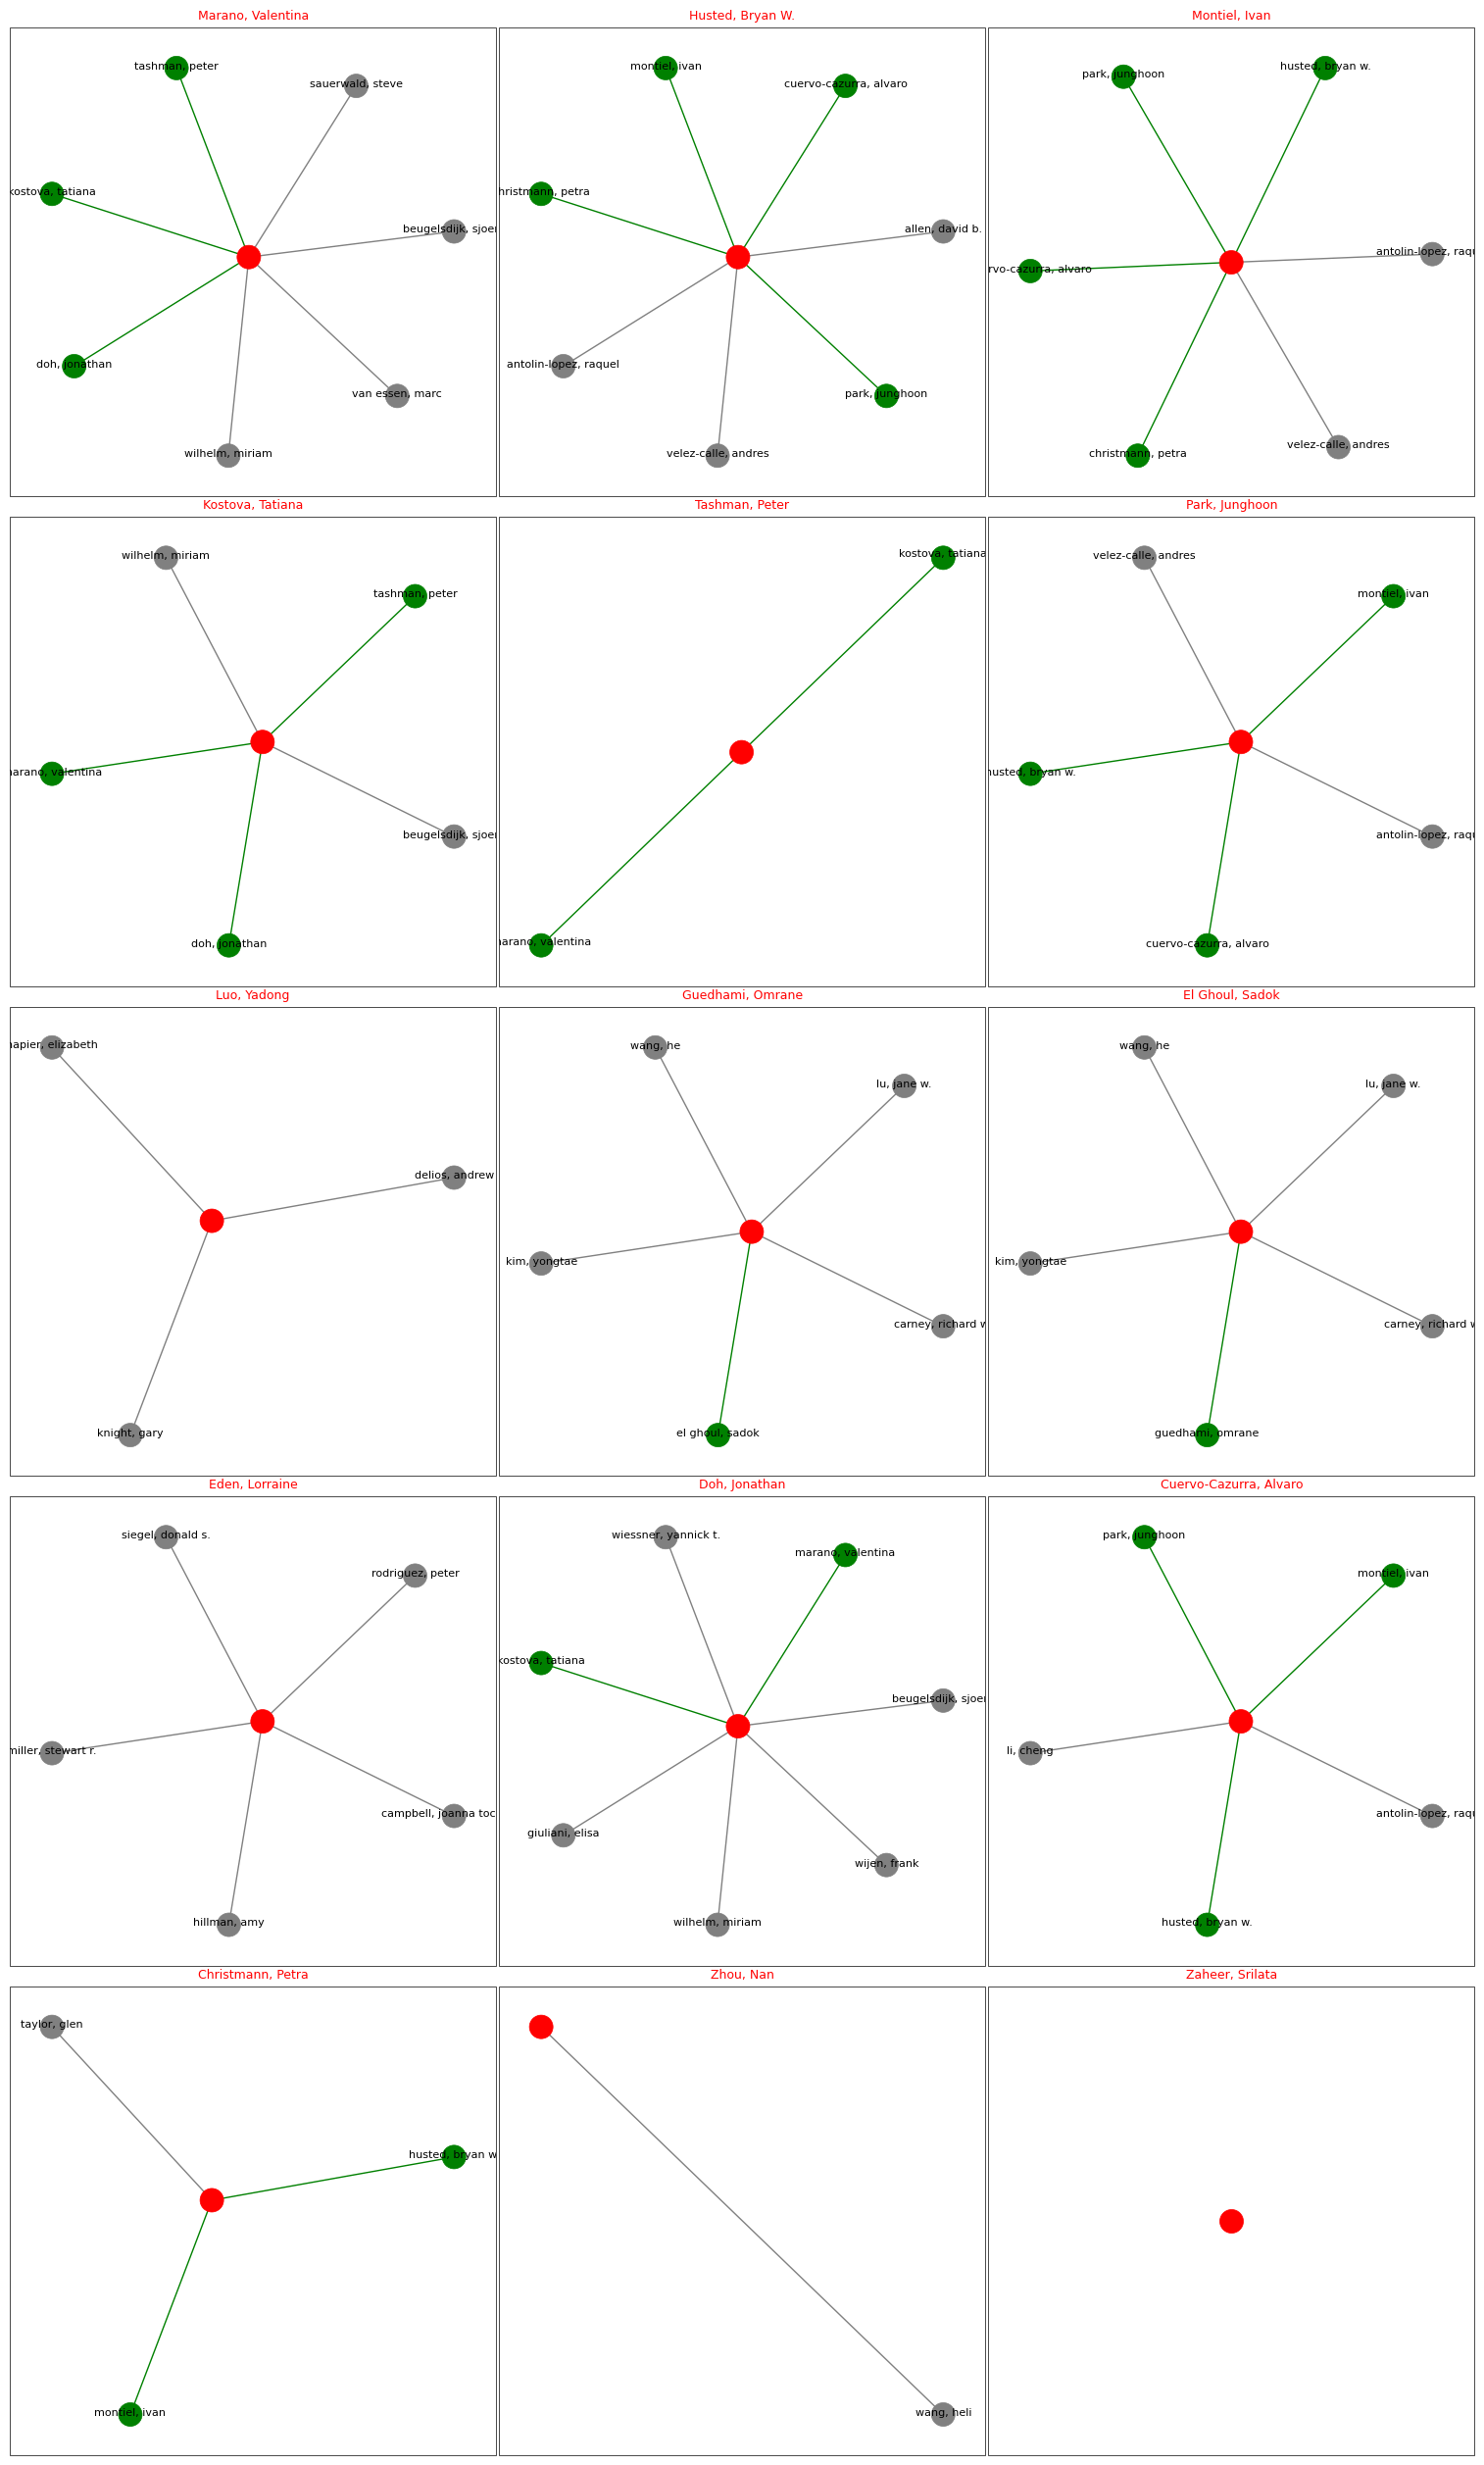

In [90]:
# Arguments:
# entry      = 'aut', 'cout', 'inst', 'kwa', or 'kwp'.
# tgt        = List of specific names.
# topn       = Integer. Specifies the number of top authors to display based on their total contributions.
# rows       = Integer. Defines the number of rows in the subplot grid for the visual layout.
# cols       = Integer. Defines the number of columns in the subplot grid for the visual layout.
# wspace     = Float. Adjusts horizontal spacing between subplots.
# hspace     = Float. Adjusts vertical spacing between subplots.
# tspace     = Float. Sets additional vertical space between nodes and labels for better readability.
# node_size  = Integer. Controls the size of each node in the network graph.
# font_size  = Integer. Defines the font size for node labels.
# pad        = Float. Adjusts padding around the layout for a balanced appearance.
# nd_a       = Color string (e.g., '#FF0000'). Specifies the color for the primary node (main author).
# nd_b       = Color string (e.g., '#008000'). Specifies the color for secondary nodes (authors with significant links).
# nd_c       = Color string (e.g., '#808080'). Specifies the color for other nodes (authors with minor links).
# verbose    = Boolean. If True, prints details of each main node and its connections in the console; if False, suppresses this output.
bibfile.network_collab( entry     = 'aut',
                        tgt       = [],
                        topn      = 15,
                        rows      = 5,
                        cols      = 3,
                        wspace    = 0.2,
                        hspace    = 0.2,
                        tspace    = 0.01,
                        node_size = 300,
                        font_size = 8,
                        pad       = 0.2,
                        nd_a      = '#FF0000',
                        nd_b      = '#008000',
                        nd_c      = '#808080',
                        verbose   = False)

In [91]:
print(bibfile.ask_gpt_ct)

[[['marano, valentina'], ['beugelsdijk, sjoerd', 'doh, jonathan', 'kostova, tatiana', 'sauerwald, steve', 'tashman, peter', 'van essen, marc', 'wilhelm, miriam']], [['husted, bryan w.'], ['allen, david b.', 'antolin-lopez, raquel', 'christmann, petra', 'cuervo-cazurra, alvaro', 'montiel, ivan', 'park, junghoon', 'velez-calle, andres']], [['montiel, ivan'], ['antolin-lopez, raquel', 'christmann, petra', 'cuervo-cazurra, alvaro', 'husted, bryan w.', 'park, junghoon', 'velez-calle, andres']], [['kostova, tatiana'], ['beugelsdijk, sjoerd', 'doh, jonathan', 'marano, valentina', 'tashman, peter', 'wilhelm, miriam']], [['tashman, peter'], ['kostova, tatiana', 'marano, valentina']], [['park, junghoon'], ['antolin-lopez, raquel', 'cuervo-cazurra, alvaro', 'husted, bryan w.', 'montiel, ivan', 'velez-calle, andres']], [['luo, yadong'], ['delios, andrew', 'knight, gary', 'napier, elizabeth']], [['guedhami, omrane'], ['carney, richard w.', 'el ghoul, sadok', 'kim, yongtae', 'lu, jane w.', 'wang, he

In [92]:
# Network - Citation Analisys Between Documents (Blue Nodes) and Citations (Red Nodes).  (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            min_count   = Relationship between nodes that have been cited at least x times;
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            local_nodes = True or False (True -> Only the blue will be displayed, False -> Red and Blue nodes will be displayed)
bibfile.network_adj_dir(view = 'notebook', min_count = 40, node_labels = True, local_nodes = False)

In [93]:
# View Table
data_nad = bibfile.ask_gpt_nad
data_table.DataTable(data_nad, num_rows_per_page = 15)

,Paper,Cited Reference


In [95]:
# Network - Highlight Citation Analysis Between Documents (Blue Nodes) and Citations (Red Nodes).  (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            article_ids = A list of Blue Nodes. It indicates the documents cited by them;
#            ref_ids     = A list of Red Nodes. It indicates the documents that cites them
bibfile.find_nodes_dir(view = 'notebook', article_ids = ['100'], ref_ids = [])

ValueError: '10' is not in list

In [ ]:
# Network - Highlight Citation Analysis Between Documents (Blue Nodes) and Citations (Red Nodes).  (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            article_ids = A list of Blue Nodes. It indicates the documents cited by them;
#            ref_ids     = A list of Red Nodes. It indicates the documents that cites them
bibfile.find_nodes_dir(view = 'notebook', article_ids = [], ref_ids = ['r_1937'])

In [96]:
# Network - Local Documents (Only Blue Nodes) Citation History. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            min_count   = Relationship between nodes that have connected at least x times;
#            node_size   = -1. (If node_size = -1 then the default value will be used. If node_size > 0 then this new value will be used);
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            back        = A list of documents. It shows the documents cited by them direct and indirectly;
#            forward     = A list of documents. It shows the documents that cites them direct and indirectly
bibfile.network_hist(view = 'notebook', min_count = 0, node_size = -1, node_labels = True, back = [], forward = [])

TypeError: pbx_probe.network_hist() got an unexpected keyword argument 'min_count'

In [97]:
# View Table
data_hist = bibfile.ask_gpt_hist
data_table.DataTable(data_hist, num_rows_per_page = 15)

AttributeError: 'pbx_probe' object has no attribute 'ask_gpt_hist'

In [98]:
# Network - Local Documents (Only Blue Nodes) Citation History. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            min_count   = Relationship between nodes that have connected at least x times;
#            node_size   = -1. (If node_size = -1 then the default value will be used. If node_size > 0 then this new value will be used);
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            back        = A list of documents. It shows the documents cited by them direct and indirectly;
#            forward     = A list of documents. It shows the documents that cites them direct and indirectly
bibfile.network_hist(view = 'notebook', min_count = 0, node_size = -1, node_labels = True, back = ['40'], forward = [])

TypeError: pbx_probe.network_hist() got an unexpected keyword argument 'min_count'

In [ ]:
# Network - Local Documents (Only Blue Nodes) Citation History. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            min_count   = Relationship between nodes that have connected at least x times;
#            node_size   = -1. (If node_size = -1 then the default value will be used. If node_size > 0 then this new value will be used);
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            back        = A list of documents. It shows the documents cited by them direct and indirectly;
#            forward     = A list of documents. It shows the documents that cites them direct and indirectly
bibfile.network_hist(view = 'notebook', min_count = 0, node_size = -1, node_labels = True, back = [], forward = ['178'])

In [ ]:
# Network - Collaboration Analysis Between Authors, Countries, Intitutions Or Adjacency Analysis Between Authors' Keywords or Keywords Plus. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            adj_type    = 'aut', 'cout', 'inst', 'kwa', or 'kwp'
#            min_count   = Relationship between nodes that have connected at least x times;
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            node_size   = -1. (If node_size = -1 then the default value will be used. If node_size > 0 then this new value will be used);
#            label_type  = 'id', 'name' (Only meaningfull if node_labels = True. 'id' -> The ID will be displayed; 'name' -> The name will be displayed);
#            centrality  = 'degree', 'load', 'betw', 'close', 'eigen', 'katz', 'harmonic', or None. Color nodes according to centrality criterion
#                          'degree'   = Degree Centrality
#                          'load'     = Load Centrality
#                          'betw'     = Betweenness Centrality
#                          'close'    = Closeness Centrality
#                          'eigen'    = Eigenvector Centrality
#                          'katz'     = Katz Centrality
#                          'harmonic' = Harmonic Centrality
#                           None      = The Community Algorithm, Girvan-Newman, will be used Instead of a Centrality Criterion
bibfile.network_adj(view = 'notebook', adj_type = 'aut', min_count = 5, node_labels = True, label_type = 'name', centrality = None)

# PS: If a centrality criterion is used then the values can be obtained by the following command:  bibfile.table_centr

In [ ]:
# View Table
data_adj = bibfile.ask_gpt_adj
data_table.DataTable(data_adj, num_rows_per_page = 15)

In [ ]:
# Network - Highlight  Collaboration Analysis Between Authors, Countries, Intitutions Or Adjacency Analysis Between Authors' Keywords or Keywords Plus. (An interactive plot).
# Arguments: view      = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            node_ids  = A list of IDs. Only meaningfull if label_type = 'id';
#            node_name = A list of Names. Only meaningfull iflabel_type = 'name';
#            node_only = True or False (True -> Only the Node will be Highlighted, False -> Node and its Connections will be Highlighted)
bibfile.find_nodes(node_ids = [], node_name = ['fernandez, eduardo'], node_only = False)

In [ ]:
# Network - Similarity Analysis using coupling or cocitation methods. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            sim_type    = 'coup', 'cocit' ('coup' -> Coupling Method, 'cocit' -> Cocitation Method)
#            node_size   = -1. (If node_size = -1 then the default value will be used. If node_size > 0 then this new value will be used);
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            cut_coup    = Cutoff value for Coupling Method. Only meaninfull if sim_type = 'coup';
#            cut_cocit   = Cutoff value for Cocitation Method. Only meaninfull if sim_type = 'cocit'
bibfile.network_sim(view = 'notebook', sim_type = 'cocit', node_size = 10, node_labels = True, cut_coup = 0.3, cut_cocit = 10)

In [ ]:
# Check Similarity Values
data_table.DataTable(bibfile.sim_table, num_rows_per_page = 15)

In [ ]:
# Network - Collaboration Analysis Between Countries using a Map. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            connections = True or False (True -> Countries connections will be displayed, False -> Countries connections will not be displayed);
#            country_lst = Highlight the Connections Between a List of Countries
bibfile.network_adj_map(view = 'notebook', connections = True, country_lst = [])

In [ ]:
# View Table
data_map = bibfile.ask_gpt_map
data_table.DataTable(data_map, num_rows_per_page = 15)

In [ ]:
# Network - Collaboration Analysis Between Countries using a Map. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            connections = True or False (True -> Countries connections will be displayed, False -> Countries connections will not be displayed);
#            country_lst = Highlight the Connections Between a List of Countries
bibfile.network_adj_map(view = 'notebook', connections = False, country_lst = ['Mexico'])

In [99]:
# NLP
# Arguments: corpus_type       = 'abs', 'title', 'kwa', or 'kwp';
#            stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                                'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                                'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                                'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
bibfile.create_embeddings(stop_words = ['en'], rmv_custom_words = [], corpus_type = 'abs')
emb = bibfile.embds

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [100]:
# NLP #-1 refers to all outliers and should typically be ignored.
# Arguments: stop_words  = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                        'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                        'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                        'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            embeddings        = True or False. If True then word embeddings are used to create the topics
bibfile.topics_creation(stop_words = ['en'], rmv_custom_words = [], embeddings = False)

   Topic  Count                      Name  \
0     -1     59  -1_csr_firms_mnes_social   

                                      Representation  \
0  [csr, firms, mnes, social, research, instituti...   

                                 Representative_Docs  
0  [prior studies found foreign affiliates multin...  


In [101]:
# Authors Production per Topic
production_topics = bibfile.topics_authors(topn = 15)
production_topics

,-1,Total
"marano, valentina",4,4
"husted, bryan w.",4,4
"montiel, ivan",3,3
"kostova, tatiana",3,3
"tashman, peter",2,2
"park, junghoon",2,2
"luo, yadong",2,2
"guedhami, omrane",2,2
"el ghoul, sadok",2,2
"cuervo-cazurra, alvaro",2,2


In [102]:
# NLP
# Each document Topic
topics = bibfile.topics

In [103]:
# NLP
# Each document Probability to belong a Topic
probs = bibfile.probs

In [104]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics_distribution(view = 'notebook')

In [105]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics(view = 'notebook')

In [108]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
#bibfile.graph_topics_projection(view = 'notebook')

In [109]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
#bibfile.graph_topics_heatmap(view = 'notebook')

In [110]:
# NLP
bibfile.topics_representatives()

,Topic,Docs
0,-1.0,


In [111]:
# NLP
similar_topics, similarity = bibfile.topic_model.find_topics('electre', top_n = 10)
for i in range(0, len(similar_topics)):
  print('Topic: ', similar_topics[i], 'Correlation: ', round(similarity[i], 3))

Topic:  -1 Correlation:  0.082


In [112]:
# NLP
bibfile.topic_model.save('my_topic_model')
#loaded_topic_model = BERTopic.load('my_topic_model')

2025-01-11 13:03:44,690 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


In [113]:
# W2V
model, corpus, w_emb, vocab = bibfile.word_embeddings(stop_words        = ['en'],
                                                      lowercase         = True,
                                                      rmv_accents       = True,
                                                      rmv_special_chars = False,
                                                      rmv_numbers       = True,
                                                      rmv_custom_words  = [],
                                                      vector_size       = 100,
                                                      window            = 5,
                                                      min_count         = 1,
                                                      epochs            = 10)

In [114]:
# W2V - Similarity
similarity = bibfile.word_embeddings_sim(model, word_1 = 'mcda', word_2 = 'risk')
similarity

0.8974827

In [122]:
# W2V - Find Docs
results = bibfile.word_embeddings_find_doc(corpus, target_words = ['csr', 'mne'])
results

[(2,
  'What is the relationship of global and local ( country-specific)   corporate social responsibility ( CSR) to international organizational   strategy? Applying the strategic logic of the Bartlett and Ghoshal   typology to the realm of CSR, multinational firms should respond to   pressures for integration and responsiveness from salient stakeholders.   However, an institutional logic would suggest that multinational firms   will simply replicate the existing product-market organizational   strategy ( multidomestic, transnational, global) in their management of   CSR. These alternative approaches are tested with a survey instrument   sent to MNEs operating in Mexico. The results of this study are   consistent with the proposition that institutional pressures, rather   than strategic analysis of social issues and stakeholders, are guiding   decision-making with respect to CSR. We develop implications for MNE   management and research, as well as public policy.'),
 (10,
  "Prior stu

In [123]:
# W2V - Operations
operations = bibfile.word_embeddings_operations(model, positive = ['mcda', 'group'], negative = ['risk'], topn = 10)
operations

[('sixth', 0.903407633304596),
 ('due', 0.901159405708313),
 ('of', 0.8997235894203186),
 ('sheds', 0.8995928764343262),
 ('qadhafi', 0.8992798328399658),
 ('draw', 0.8992530107498169),
 ('wide', 0.8989392518997192),
 ('shows', 0.8987650871276855),
 ('magnify', 0.8986967206001282),
 ('lof', 0.8986856937408447)]

In [127]:
# W2V - Operations Plot.
bibfile.plot_word_embeddings(model,
                             view      = 'notebook',
                             positive  = [ ['mcda', 'csr'], ['ceo'],             ['csr']],
                             negative  = [ ['risk'],          ['research', 'analysis'], []       ],
                             topn      = 5,
                             node_size = 10,
                             font_size = 14)

In [130]:
# NLP - Abstractive Summarization
# Arguments: article_ids = A list of documents to perform an abstractive summarization with the available abstracts. If the list is empty then all documents will be used
#            model_name  = Available pre-trained models. Complete list is available at  https://huggingface.co/models?pipeline_tag=summarization&sort=downloads&search=pegasus
abs_summary = bibfile.summarize_abst_peg(article_ids = [3, 6, 24], model_name = 'google/pegasus-xsum')


Total Number of Valid Abstracts:  3



tokenizer_config.json:   0%|          | 0.00/87.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.52M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/259 [00:00<?, ?B/s]

In [133]:
# NLP - Check Abstractive Summarization
print(textwrap.fill(abs_summary, 150))

China is one of the world's fastest-growing economies, and many of its private firms are led by owners who have returned from abroad to improve their
managerial skills and increase their company's competitiveness. Our findings document the positive impact of education/training abroad on two CSR
measures: sustainability initiative scope and charitable donation intensity. and the impact of education/training abroad on two CSR measures:
sustainability initiative scope and charitable donation intensity. and the impact of education/training abroad on two CSR measures: sustainability
initiative scope and charitable donation intensity. and the impact of education/training abroad on two CSR measures: sustainability initiative scope
and charitable donation intensity.


In [134]:
# NLP - Abstractive Summarization - chatGPT

# OBS 1: Requires the user to have an **API key** (https://platform.openai.com/account/api-keys))
# OBS 2: The limit of characters is 4097 per request

# Arguments: article_ids   = A list of documents to perform an abstractive summarization with the available abstracts. If the list is empty then all documents will be used
#            join_articles = If False then the abstracts will be analyzed separately. If True then the abstracts will be concate in a single text
#            api_key       = 'your_api_key_here'. Insert your personal API key (https://platform.openai.com/account/api-keys)
#            model         = Specifies the AI model used for text generation. The default value is "text-davinci-003"
#            query         = Ask chatGPT what you want to do with the abstracts. The default query is: 'from the following scientific abstracts, summarize the main information in a single paragraph using around 250 words'
abs_summary_chat = bibfile.summarize_abst_chatgpt(article_ids = [233, 164, 180], join_articles = True, api_key = 'your_api_key_here', query = 'from the following scientific abstracts, summarize the main information in a single paragraph using around 250 words', model = 'gpt-4')

In [135]:
# NLP - Check Abstractive Summarization
print(textwrap.fill(abs_summary_chat, 250))

No abstracts were found in the selected set of documents


In [ ]:
# NLP - Extractive Summarization
# Arguments: article_ids = A list of documents to perform an extractive summarization with the available abstracts. If the list is empty then all documents will be used
ext_summary = bibfile.summarize_ext_bert(article_ids = [233, 164, 180])

In [ ]:
# NLP - Check Extractive Summarization
print(textwrap.fill(ext_summary, 150))

In [ ]:
# Filter the .bib File
# Arguments: document = A list of documents to retain. The other documents will be deleted
#            doc_type = A list of doc types. Check the 'report' to select the available types;
#            year_str = An integer the determines the starting year of collection -1 = All years;
#            year_end = An integer the determines the ending year of collection   -1 = All years;
#            sources  = A list of sources. Check the cell '# Check Sources IDs' to select the available types;
#            core     = A integer (-1, 1, 2, 3, 12, or 23) -1 = All sources, 1 = Bradford core 1, 2 = Bradford core 2, 3 = Bradford core 3, 12 = Bradford core 1 and 2, 23 = Bradford core 2 and 3;
#            country  = A list of countries. Check the cell '# Check Countries IDs' to select the available types;
#            language = A list of languages. Check the 'report' to select the available types
#            abstract = True or False. True removes UNKNOW values from the abstract.
bibfile.filter_bib(documents = [], doc_type = [], year_str = -1, year_end = -1, sources = [], core = -1, country = [], language = [], abstract = False)

In [ ]:
# Correct the .bib File
# Arguments: get         = A list of the current name(s);
#            replace_for = A string. This string will replace all matchs from the 'get' argument list
bibfile.merge_author(get = [], replace_for = 'name')
bibfile.merge_institution(get = [], replace_for = 'name')
bibfile.merge_country(get = [], replace_for = 'name')
bibfile.merge_language(get = [], replace_for = 'name')
bibfile.merge_source(get = [], replace_for = 'name')

In [ ]:
# Work with modified .bib File

# 1) Input a .bib to instantiate a class => bibfile  = pbx_probe(file_bib = file_name, db = database, del_duplicated = True)
# 2) Then made the modifications and save the data externally => bibfile.save_database(sep = '\t', name = 'data.csv')
# 3) To load the modified .bib file ( 'data.csv') => bibfile.load_database(name = 'data.csv')

# PS: Even with the saved 'data.csv', you always need to do step 1, so to be fast, have any small .bib file in hand.
# Then, you can go directly to step 3, and your saved .bib ('data.csv') will replace the small .bib